In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
colnames=['noTimesPregnant', 'glucoseConcentration', 'bloodPressure', 'skinFoldThickness', 'serumInsulin', 
         'BMI', 'diabetesPedigree', 'age', 'class'] 

df = pd.read_csv('dataset.csv', names=colnames, header=None)
df.head()

,noTimesPregnant,glucoseConcentration,bloodPressure,skinFoldThickness,serumInsulin,BMI,diabetesPedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Check for Null Data
df.isnull().sum()

noTimesPregnant         0
glucoseConcentration    0
bloodPressure           0
skinFoldThickness       0
serumInsulin            0
BMI                     0
diabetesPedigree        0
age                     0
class                   0
dtype: int64

In [43]:
#
# TODO: Handle zero entries in column
#
# inputVariables=['glucoseConcentration', 'bloodPressure', 'skinFoldThickness', 'serumInsulin', 
#          'BMI', 'diabetesPedigree', 'age']
# for field in inputVariables:
#         print('field %s: num 0-entries: %d' % (field, len(df.loc[ df[field] == 0, field ])))
        
# zero_fields = ['glucoseConcentration', 'bloodPressure', 'skinFoldThickness', 'serumInsulin', 'BMI']

# def check_zero_entries(data, fields):
#     """ List number of 0-entries in each of the given fields"""
#     for field in fields:
#         print('field %s: num 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))
# check_zero_entries(df, zero_fields)

KeyError: 'glucoseConcentration'

In [9]:
# X = all columns except the class column
X = df.drop(['class'], axis=1)
# Y =  dependent variable column
Y = df['class']

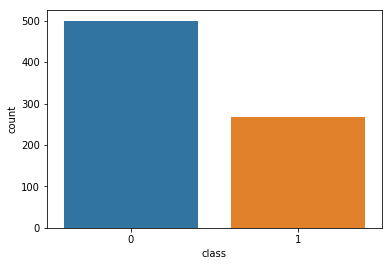

In [13]:
# dependent variable
sns.countplot(Y,label="Count")

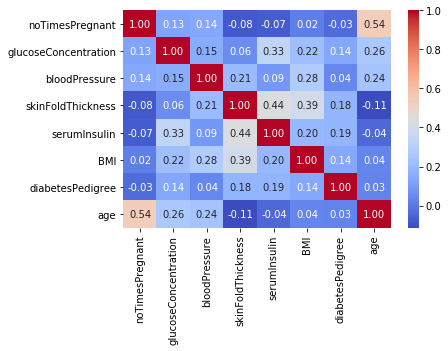

In [14]:
# Correlation matrix between numerical values
g = sns.heatmap(X.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

/Users/chinmay/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/chinmay/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


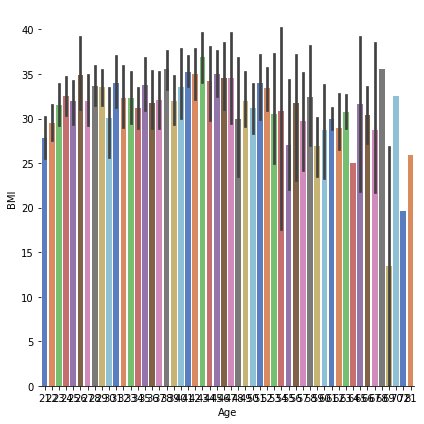

In [23]:
# Explore Age vs BMI
g = sns.factorplot(x="age",y="BMI",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_xlabels("Age")
g = g.set_ylabels("BMI")

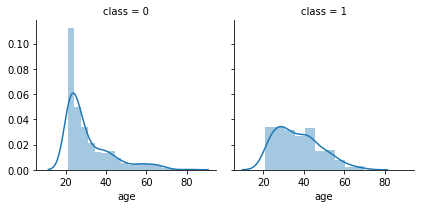

In [19]:
# Explore Age vs dependent variable
g = sns.FacetGrid(df, col='class')
g = g.map(sns.distplot, "age")

In [25]:
# Feature scaling
# The MinMaxScaler transforms features by scaling each feature to a given range.
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(x_scaled)

/Users/chinmay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
df.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [34]:
# split data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
    test_size=0.2,random_state=1)

In [44]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [45]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=150, batch_size=10)

Epoch 1/150
614/614 [==============================] - 0s 257us/step - loss: 0.4850 - acc: 0.7638
Epoch 2/150
614/614 [==============================] - 0s 184us/step - loss: 0.4741 - acc: 0.7752
Epoch 3/150
614/614 [==============================] - 0s 182us/step - loss: 0.4709 - acc: 0.7785
Epoch 4/150
614/614 [==============================] - 0s 174us/step - loss: 0.4708 - acc: 0.7769
Epoch 5/150
614/614 [==============================] - 0s 189us/step - loss: 0.4690 - acc: 0.7801
Epoch 6/150
614/614 [==============================] - 0s 158us/step - loss: 0.4751 - acc: 0.7720
Epoch 7/150
614/614 [==============================] - 0s 194us/step - loss: 0.4718 - acc: 0.7687
Epoch 8/150
614/614 [==============================] - 0s 167us/step - loss: 0.4733 - acc: 0.7687
Epoch 9/150
614/614 [==============================] - 0s 158us/step - loss: 0.4697 - acc: 0.7785
Epoch 10/150
614/614 [==============================] - 0s 184us/step - loss: 0.4676 - acc: 0.7720
Epoch 11/150
614/61

614/614 [==============================] - 0s 215us/step - loss: 0.4431 - acc: 0.7720
Epoch 84/150
614/614 [==============================] - 0s 204us/step - loss: 0.4526 - acc: 0.7899
Epoch 85/150
614/614 [==============================] - 0s 187us/step - loss: 0.4502 - acc: 0.7850
Epoch 86/150
614/614 [==============================] - 0s 213us/step - loss: 0.4544 - acc: 0.7899
Epoch 87/150
614/614 [==============================] - 0s 235us/step - loss: 0.4605 - acc: 0.7720
Epoch 88/150
614/614 [==============================] - 0s 247us/step - loss: 0.4564 - acc: 0.7736
Epoch 89/150
614/614 [==============================] - 0s 210us/step - loss: 0.4582 - acc: 0.7834
Epoch 90/150
614/614 [==============================] - 0s 202us/step - loss: 0.4668 - acc: 0.7834
Epoch 91/150
614/614 [==============================] - 0s 180us/step - loss: 0.4568 - acc: 0.7818
Epoch 92/150
614/614 [==============================] - 0s 168us/step - loss: 0.4482 - acc: 0.7801
Epoch 93/150
614/614 [=

In [55]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

154/154 [==============================] - 0s 81us/step
Accuracy: 78.57


In [56]:
# make class predictions with the model
Y_pred = model.predict_classes(X_test)

In [57]:
# Plot confusion matrix for GaussianNB
confusion_matrix(Y_test, Y_pred)

array([[94,  5],
       [28, 27]])